In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishkumarak/netflix-reviews-playstore-daily-updated")

print("Path to dataset files:", path)


ModuleNotFoundError: No module named 'kagglehub'

In [73]:
import pandas as pd
import re 
df = pd.read_csv("netflix_reviews.csv")

In [74]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,166731e8-4b10-4968-838d-329473357328,Sylviah Chichi,Great App on the move ..... I can watch my mov...,5,0,8.136.0 build 3 50908,2024-10-21 14:15:31,8.136.0 build 3 50908
1,68bab7d0-2afc-4454-970f-159ced93d751,Marilyn Goeda,good,5,0,NaN,2024-10-21 14:08:15,NaN
2,6c2d3e85-b5ca-4228-93bd-abd2236eab51,Nikhil Pk,Need to improve and to update some error durin...,3,0,8.131.0 build 3 50829,2024-10-21 13:54:11,8.131.0 build 3 50829
3,d62b0303-4c87-4c96-9c2c-a3ca6e0b056d,Mmesoma Eberechukwu,"Netflix is a nice app,but not all the movies a...",3,0,8.136.0 build 3 50908,2024-10-21 13:30:42,8.136.0 build 3 50908
4,d6014252-863e-4e06-b440-25e0ece47a31,Keabetswe Monaise,Not much availability considering options on w...,3,0,8.136.0 build 3 50908,2024-10-21 13:28:43,8.136.0 build 3 50908


In [75]:
df.tail()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117129,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117130,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117131,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117132,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117133,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


In [76]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [77]:
df.shape

(117134, 8)

In [78]:
print("Shape of the dataset: ",df.shape)
print("Columns in the dataset: ",df.columns)

Shape of the dataset:  (117134, 8)
Columns in the dataset:  Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [79]:
# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [80]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].apply(preprocess_text)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ebd,sylviah chichi,great app on the move i can watch my movies a...,5,0,build,,build
1,babdafcfcedd,marilyn goeda,good,5,0,,,
2,cdebcabdabdeab,nikhil pk,need to improve and to update some error durin...,3,0,build,,build
3,dbccccacaebd,mmesoma eberechukwu,netflix is a nice appbut not all the movies ar...,3,0,build,,build
4,deebeecea,keabetswe monaise,not much availability considering options on w...,3,0,build,,build


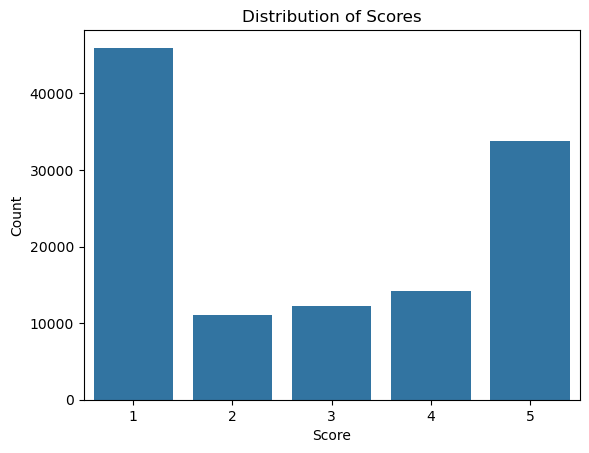

In [81]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

# 리뷰 점수와 리뷰 개수를 계산
score_counts = df['score'].value_counts().reset_index()
score_counts.columns = ['Score', 'Count']

# 막대 그래프 그리기
sns.barplot(x='Score', y='Count', data=score_counts)
plt.xlabel('Score')  # x축 이름
plt.ylabel('Count')  # y축 이름
plt.title('Distribution of Scores')  # 그래프 제목
plt.show()


ModuleNotFoundError: No module named 'torchtext'